**Actividad autónoma U2-T1 (AA3)**

Brayan Cardenas




Objetivo de la actividad: Diseñar una solución orientada a objetos en 
Python que implemente desde cero el algoritmo K-Nearest Neighbors 
(KNN) para clasificar ejemplares del dataset penguins, analizando el 
efecto de distintos valores de k sobre la asignación de especie.

Instrucciones:  
Escenario: Clasificación de Pingüinos Antárticos        
Un instituto de biología necesita un clasificador que, a partir de 
mediciones morfológicas de pingüinos, prediga su especie (Adelie, 
Chinstrap o Gentoo).

In [1]:
import numpy as np
from abc import ABC


**Cargar y limpiar el dataset de pingüinos**

In [14]:
import pandas as pd

# Cargar desde CSV si estuviera en archivo: pd.read_csv("penguins.csv")
df = pd.read_csv("penguins.csv")  # Reemplaza esto con la ruta correcta si es necesario

# Eliminar filas con valores faltantes (NaN)
df = df.dropna()

# Seleccionar características (input X) y etiquetas (output y)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['species'].values


**Creacion la clase abstracta KNNBase**

In [15]:
class KNNBase(ABC):
    @abstractmethod
    def fit(self, X, y):
        pass

    @abstractmethod
    def distance(self, p1, p2):
        pass

    @abstractmethod
    def predict(self, X_new, k=3):
        pass


**Creacion la clase KNNClassifier**

**Agregamos  sobrecarga de operadores**

__eq__ — igualdad de ejemplares

__add__ — combinar dos clasificadores

Representación de ejemplares __repr__

In [25]:
class KNNClassifier(KNNBase):
    def __init__(self):
        self.__X_train = None
        self.__y_train = None

    def fit(self, X, y):
        self.__X_train = X
        self.__y_train = y

    def distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

    def predict(self, X_new, k=3):
        predictions = []
        for x in X_new:
            distances = [self.distance(x, xi) for xi in self.__X_train]
            indices = np.argsort(distances)[:k]
            labels = [self.__y_train[i] for i in indices]
            prediction = max(set(labels), key=labels.count)
            predictions.append(prediction)
        return predictions

    def __eq__(self, other):
        return np.array_equal(self.__X_train, other.__X_train) and np.array_equal(self.__y_train, other.__y_train)

    def __add__(self, other):
        X_comb = np.vstack((self.__X_train, other.__X_train))
        y_comb = np.hstack((self.__y_train, other.__y_train))
        new_model = KNNClassifier()
        new_model.fit(X_comb, y_comb)
        return new_model

    def __repr__(self):
        return f"KNNClassifier with {len(self.__X_train)} training samples"

    def plot_neighbors(self, x_new, k=3):
        distances = [self.distance(x_new[0], xi) for xi in self.__X_train]
        indices = np.argsort(distances)[:k]

        X_all = np.vstack([self.__X_train, x_new])
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_all)

        for i, point in enumerate(X_pca[:-1]):
            label = self.__y_train[i]
            color = {'Adelie': 'red', 'Chinstrap': 'green', 'Gentoo': 'blue'}.get(label, 'gray')
            marker = 'o' if i in indices else 'x'
            plt.scatter(point[0], point[1], c=color, marker=marker, label=label if i in indices else "", s=100)

        # Nuevo punto
        plt.scatter(X_pca[-1, 0], X_pca[-1, 1], c='black', marker='*', s=250, label='Nuevo')

        plt.title(f'k = {k} vecinos más cercanos')
        plt.legend()
        plt.grid(True)
        plt.show()


**Aplicacion**

KNNClassifier with 333 training samples
Predicción para k=1: Adelie
Predicción para k=3: Adelie
Predicción para k=5: Adelie


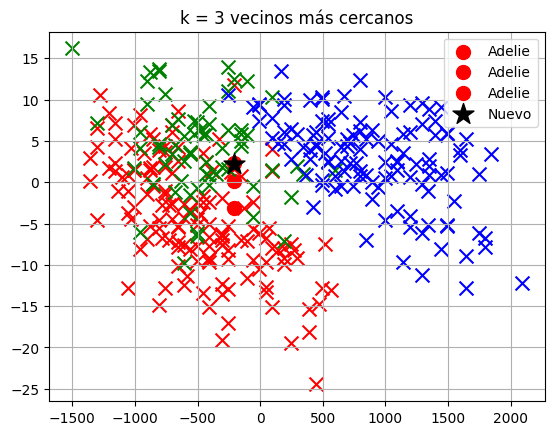

In [26]:
# Instanciar y entrenar
modelo = KNNClassifier()
modelo.fit(X, y)

# Mostrar el modelo
print(modelo)

# Crear un nuevo pingüino (valores de ejemplo reales)
nuevo_pingüino = np.array([[44.0, 18.0, 200, 4000]])  # largo pico, profundidad, aletas, peso

# Predecir con diferentes valores de k
for k in [1, 3, 5]:
    pred = modelo.predict(nuevo_pingüino, k=k)
    print(f"Predicción para k={k}: {pred[0]}")

# Graficar los vecinos más cercanos (RETO ADICIONAL)
modelo.plot_neighbors(nuevo_pingüino, k=3)
